In [1]:
# Step 1: importing Required Libraries and Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('d:\cca.csv')

In [3]:
# Check the shape of the dataset
print("Shape of Dataset:", df.shape)

# Check the first few rows of the dataset
print("\nFirst Few Rows of Dataset:\n", df.head())

# Check the summary statistics of the dataset
print("\nSummary Statistics of Dataset:\n", df.describe())

# Check the data types of the columns
print("\nData Types of Columns:\n", df.dtypes)

Shape of Dataset: (51, 6)

First Few Rows of Dataset:
      Year  yield  hd40  humidity  mintemp  maxtemp
0  1970.0  22.87  0.32   2567.63    17.96    28.63
1  1971.0  21.64  0.98   2548.34    17.41    28.37
2  1972.0  23.52  2.70   2280.70    17.86    28.95
3  1973.0  23.68  0.75   2598.79    18.15    28.93
4  1974.0  24.71  1.80   2684.61    17.76    28.44

Summary Statistics of Dataset:
              Year       yield       hd40     humidity    mintemp    maxtemp
count    50.00000   50.000000  50.000000    51.000000  50.000000  50.000000
mean   1994.50000   60.562000   2.409800  2369.445098  18.324200  28.989200
std      14.57738   30.537103   1.900343   160.821084   0.365983   0.328806
min    1970.00000   21.640000   0.120000  2021.940000  17.410000  28.360000
25%    1982.25000   36.892500   0.905000  2264.930000  17.982500  28.750000
50%    1994.50000   49.380000   2.015000  2346.330000  18.380000  28.965000
75%    2006.75000   98.162500   3.100000  2506.930000  18.617500  29.18500

In [4]:
# Check for missing values
print("Missing Values in Dataset:\n", df.isnull().sum())

# Drop the rows with missing values
df.dropna(inplace=True)

# convert year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set date column as index
df.set_index('Year', inplace=True)

Missing Values in Dataset:
 Year        1
yield       1
hd40        1
humidity    0
mintemp     1
maxtemp     1
dtype: int64


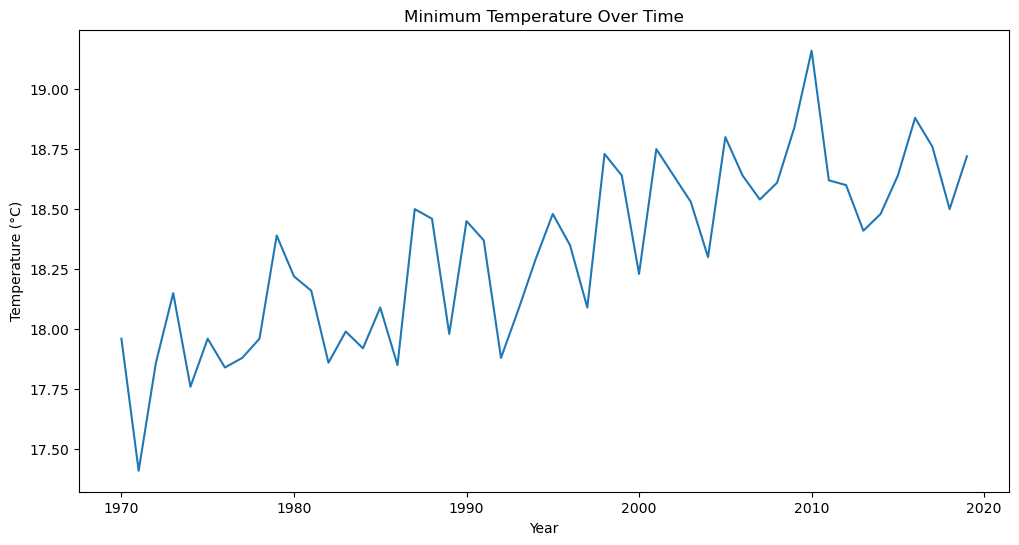

In [5]:
# Line plot of Temperature Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='mintemp', data=df)
plt.title('Minimum Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

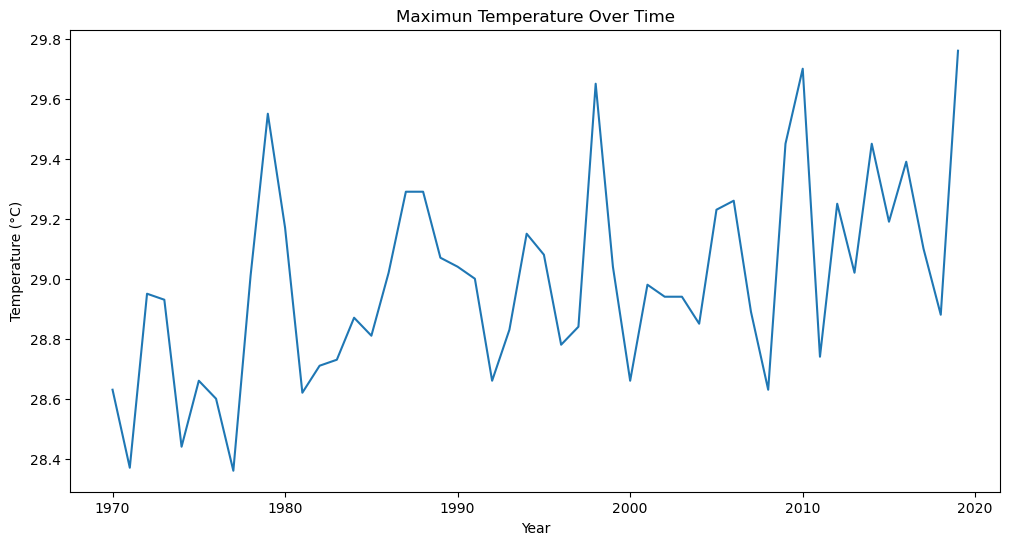

In [6]:
# Line plot of Temperature Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='maxtemp', data=df)
plt.title('Maximun Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

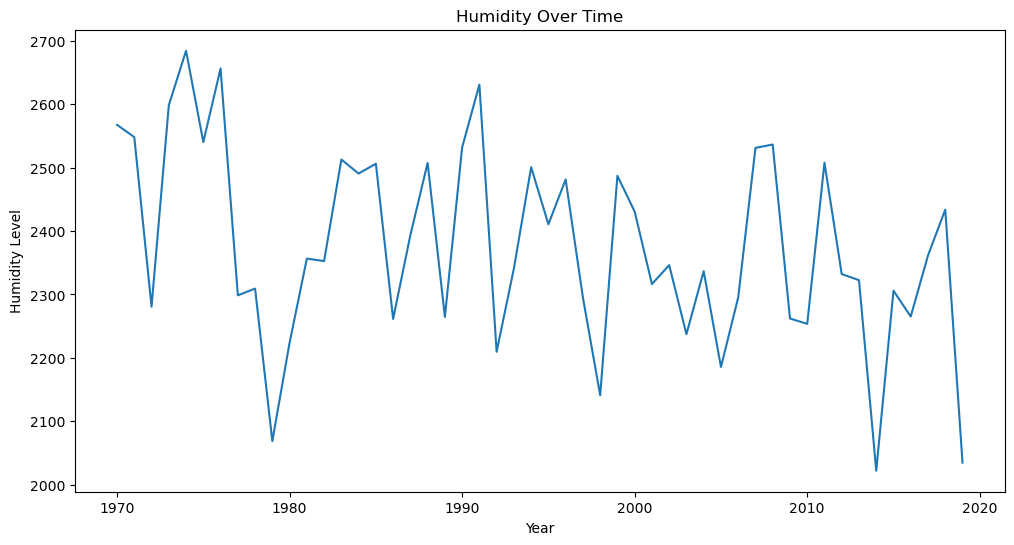

In [7]:
# Line plot of Humidity Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='humidity', data=df)
plt.title('Humidity Over Time')
plt.xlabel('Year')
plt.ylabel('Humidity Level')
plt.show()

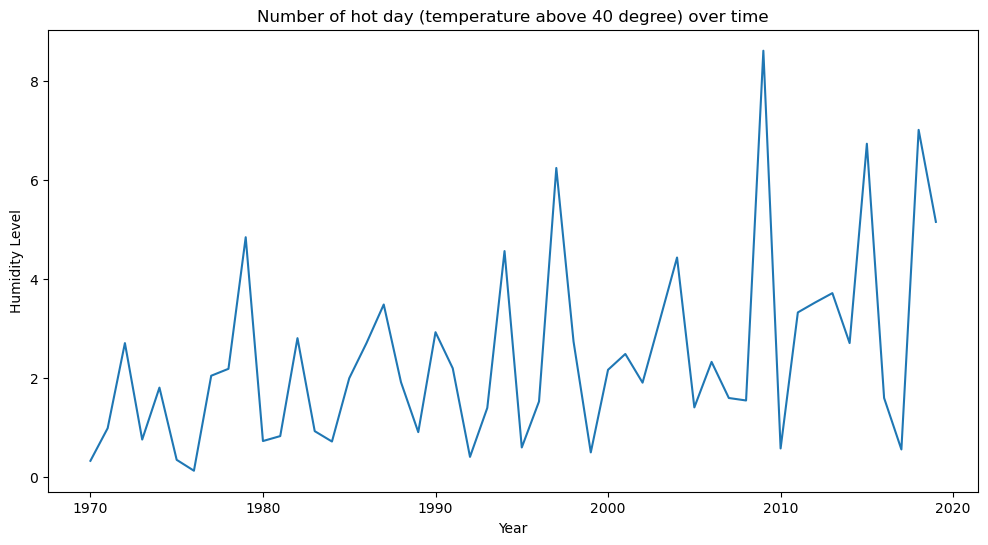

In [8]:
# Line plot of Hot day (Temperature at maximun 40 degree cercius)
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='hd40', data=df)
plt.title('Number of hot day (temperature above 40 degree) over time')
plt.xlabel('Year')
plt.ylabel('Humidity Level')
plt.show()

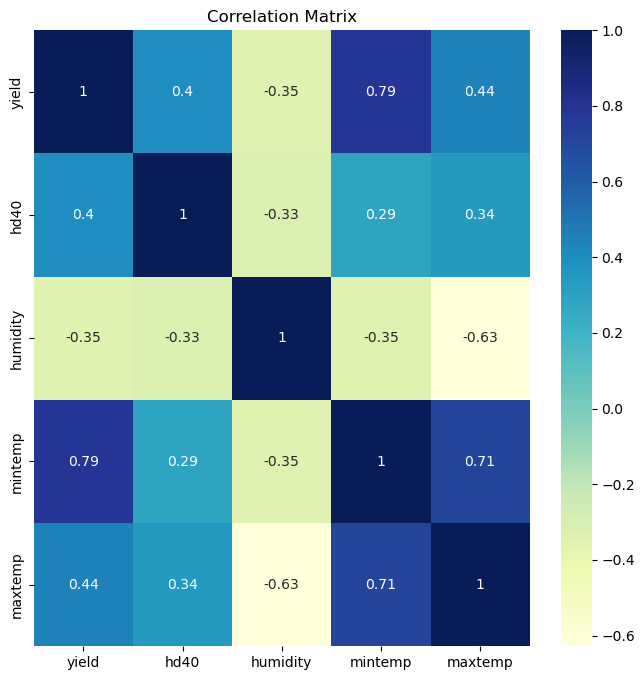

In [9]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

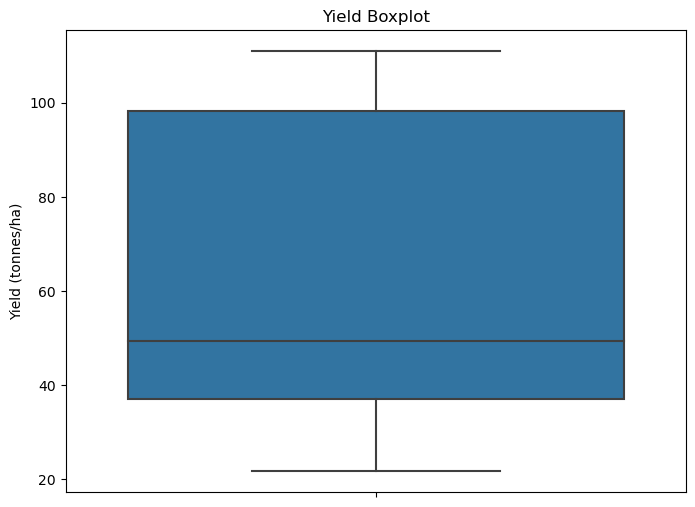

In [10]:
# Boxplot of Yield
plt.figure(figsize=(8,6))
sns.boxplot(y='yield', data=df)
plt.title('Yield Boxplot')
plt.ylabel('Yield (tonnes/ha)')
plt.show()

In [11]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("d:\cca.csv")

# Check for missing values
if data.isnull().values.any():
    # Remove rows with missing values
    data = data.dropna()

# Check for infinite values
if np.isinf(data.values).any():
    # Replace infinite values with the mean value
    mean_value = np.mean(data.values[np.isfinite(data.values)])
    data = np.nan_to_num(data, nan=mean_value, posinf=mean_value, neginf=mean_value)

In [12]:
# Decision tree regressor

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# split the data into features and target
X = data.drop("yield", axis=1)
y = data["yield"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)

# fit the model to the training data
dt_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = dt_model.predict(X_test)

# evaluate the model using R-squared and mean absolute error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean absolute error:", mae)

R-squared: 0.9038457853310139
Mean absolute error: 5.679999999999998


In [14]:
# Random forest regressor

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# split the data into features and target
X = data.drop("yield", axis=1)
y = data["yield"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rf_model.predict(X_test)
# evaluate the model using R-squared and mean absolute error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean absolute error:", mae)

R-squared: 0.971866105141673
Mean absolute error: 2.8420099999999913


In [16]:
# Support vector regression

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



# split the data into features and target
X = data.drop("yield", axis=1)
y = data["yield"]

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model
svm = SVR(kernel='linear')

# Train the model on training set
svm.fit(X_train, y_train)

# Predict crop yield on testing set
y_pred = svm.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R2 score: 0.7627944282164114
Mean squared error: 168.78014266202428
Root mean squared error: 12.991541196564182


In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Setting the year column as index
data = data.set_index('Year')

# Splitting the dataset into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data.iloc[0:train_size], data.iloc[train_size:len(data)]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(data)
test_data_scaled = scaler.transform(data)

# Creating the training and testing datasets
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
train_X, train_Y = create_dataset(train_data_scaled, look_back)
test_X, test_Y = create_dataset(test_data_scaled, look_back)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_data=(test_X, test_Y), verbose=2)

# Making predictions on the test data
test_predictions = model.predict(test_X)

# Reshaping the test data to original scale
test_predictions = scaler.inverse_transform(test_predictions)

# Calculating the root mean squared error
rmse = np.sqrt(np.mean(((test_predictions - test_data['Production'].values.reshape(-1, 1)) ** 2)))
print('RMSE:', rmse)


Epoch 1/100
1/1 - 8s - loss: 0.3333 - val_loss: 0.3077 - 8s/epoch - 8s/step
Epoch 2/100
1/1 - 0s - loss: 0.3077 - val_loss: 0.2834 - 52ms/epoch - 52ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2834 - val_loss: 0.2604 - 59ms/epoch - 59ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2604 - val_loss: 0.2385 - 56ms/epoch - 56ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2385 - val_loss: 0.2176 - 55ms/epoch - 55ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2176 - val_loss: 0.1976 - 55ms/epoch - 55ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1976 - val_loss: 0.1783 - 57ms/epoch - 57ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1783 - val_loss: 0.1599 - 59ms/epoch - 59ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1599 - val_loss: 0.1424 - 62ms/epoch - 62ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1424 - val_loss: 0.1259 - 54ms/epoch - 54ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1259 - val_loss: 0.1106 - 62ms/epoch - 62ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1106 - val_loss: 0.0967 - 72ms/epoch - 72ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0967 - va

ValueError: non-broadcastable output operand with shape (47,1) doesn't match the broadcast shape (47,5)